### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_wine
import sys
import random as rd

# Importing the Dataset

In [3]:
dataset = load_wine()
dataset.target[[10, 80, 140]]

array([0, 1, 2])

In [4]:
print('dataset.shape\t',dataset['data'].shape,
      '\ntarget.shape \t',dataset['target'].shape)

dataset.shape	 (178, 13) 
target.shape 	 (178,)


# Figuring out the data set.

In [5]:
features = pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])
data = features
data['target']=dataset['target']
data['class']=data['target'].map(lambda ind: dataset['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


### Working with some of few specific varaibles

In [133]:
X = data.iloc[:,[6,7]].values
X

array([[3.06, 0.28],
       [2.76, 0.26],
       [3.24, 0.3 ],
       [3.49, 0.24],
       [2.69, 0.39],
       [3.39, 0.34],
       [2.52, 0.3 ],
       [2.51, 0.31],
       [2.98, 0.29],
       [3.15, 0.22],
       [3.32, 0.22],
       [2.43, 0.26],
       [2.76, 0.29],
       [3.69, 0.43],
       [3.64, 0.29],
       [2.91, 0.3 ],
       [3.14, 0.33],
       [3.4 , 0.4 ],
       [3.93, 0.32],
       [3.03, 0.17],
       [3.17, 0.24],
       [2.41, 0.25],
       [2.88, 0.27],
       [2.37, 0.26],
       [2.61, 0.28],
       [2.68, 0.47],
       [2.94, 0.34],
       [2.19, 0.27],
       [2.97, 0.37],
       [2.33, 0.26],
       [3.25, 0.29],
       [3.19, 0.22],
       [2.69, 0.42],
       [2.74, 0.5 ],
       [2.53, 0.29],
       [2.98, 0.26],
       [2.68, 0.34],
       [2.43, 0.29],
       [2.64, 0.28],
       [3.04, 0.2 ],
       [3.29, 0.34],
       [2.68, 0.27],
       [3.56, 0.17],
       [2.63, 0.32],
       [3.  , 0.28],
       [2.65, 0.3 ],
       [3.17, 0.27],
       [3.39,

In [66]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100

In [68]:
K=3 # Total number of clusters

### Now we need to Initialize the centroids randomly from the data points. Here, each column will be the centroids of one cluster. 

In [70]:
Centroids=np.array([]).reshape(n,0) 
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

### Computing the euclidian distance from the centroid and assigning the cluster based on the minimal distance

In [72]:
Output={}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

### Regrouping the data points based on the cluster index C and store in the Output dictionary. The mean of separated clusters is also calculated and has been assigned as new centroids. Here, Y is a temporary dictionary which stores the solution for one particular iteration.

In [77]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)
Output=Y

### The original unclustered data

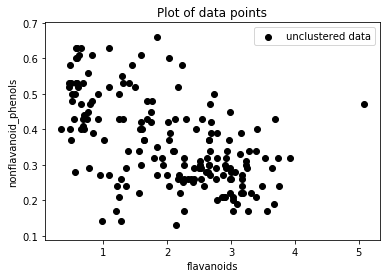

In [78]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('flavanoids')
plt.ylabel('nonflavanoid_phenols')
plt.legend()
plt.title('Plot of data points')
plt.show()

### Finally,  The clustered data

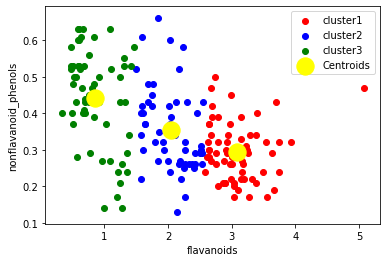

In [79]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('flavanoids')
plt.ylabel('nonflavanoid_phenols')
plt.legend()
plt.show()

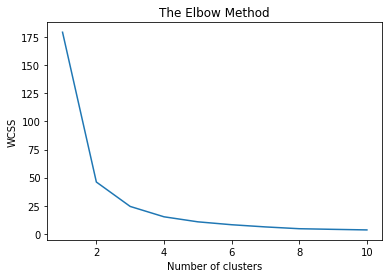

In [126]:
#Implementing the same algorithm using sklearn libraries
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = True)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

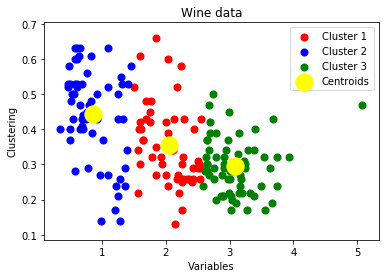

In [135]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = True)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Wine data')
plt.xlabel('Variables')
plt.ylabel('Clustering')
plt.legend()
plt.show()

### From both the clustering it can be concluded the cluster formed using SKlearn libaray is exactly the same. So the derived function works efficiently. 

### Clustering using 4 variables

In [136]:
X = data.iloc[:,5:9].values
X

array([[2.8 , 3.06, 0.28, 2.29],
       [2.65, 2.76, 0.26, 1.28],
       [2.8 , 3.24, 0.3 , 2.81],
       [3.85, 3.49, 0.24, 2.18],
       [2.8 , 2.69, 0.39, 1.82],
       [3.27, 3.39, 0.34, 1.97],
       [2.5 , 2.52, 0.3 , 1.98],
       [2.6 , 2.51, 0.31, 1.25],
       [2.8 , 2.98, 0.29, 1.98],
       [2.98, 3.15, 0.22, 1.85],
       [2.95, 3.32, 0.22, 2.38],
       [2.2 , 2.43, 0.26, 1.57],
       [2.6 , 2.76, 0.29, 1.81],
       [3.1 , 3.69, 0.43, 2.81],
       [3.3 , 3.64, 0.29, 2.96],
       [2.85, 2.91, 0.3 , 1.46],
       [2.8 , 3.14, 0.33, 1.97],
       [2.95, 3.4 , 0.4 , 1.72],
       [3.3 , 3.93, 0.32, 1.86],
       [2.7 , 3.03, 0.17, 1.66],
       [3.  , 3.17, 0.24, 2.1 ],
       [2.41, 2.41, 0.25, 1.98],
       [2.61, 2.88, 0.27, 1.69],
       [2.48, 2.37, 0.26, 1.46],
       [2.53, 2.61, 0.28, 1.66],
       [2.63, 2.68, 0.47, 1.92],
       [2.85, 2.94, 0.34, 1.45],
       [2.4 , 2.19, 0.27, 1.35],
       [2.95, 2.97, 0.37, 1.76],
       [2.65, 2.33, 0.26, 1.98],
       [3.

In [104]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100

In [105]:
K=3

In [106]:
Centroids=np.array([]).reshape(n,0) 
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [107]:
Output={}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [108]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(4,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)
Output=Y

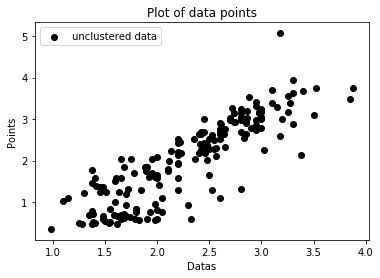

In [109]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Datas')
plt.ylabel('Points')
plt.legend()
plt.title('Plot of data points')
plt.show()

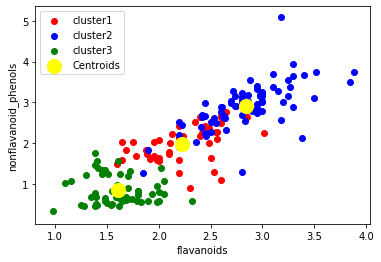

In [111]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='yellow',label='Centroids')
plt.xlabel('flavanoids')
plt.ylabel('nonflavanoid_phenols')
plt.legend()
plt.show()

Implementing the same algorithm using sklearn libraries


Using the elbow method to find the optimal number of clusters

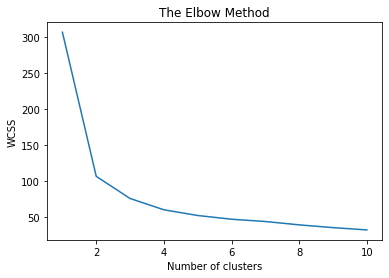

In [137]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = True)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

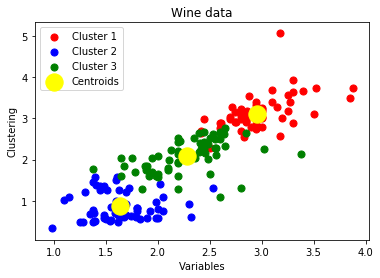

In [138]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = True)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Wine data')
plt.xlabel('Variables')
plt.ylabel('Clustering')
plt.legend()
plt.show()